<a href="https://colab.research.google.com/github/kerrykerrykerry999/tibame_tm/blob/master/Practice_L8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  作業

In [ ]:
import pandas
google = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/google_comments.xlsx', index_col = 0)

In [ ]:
google.head()

,username,score,comment
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...


In [ ]:
google['score'].value_counts()

1    160
5    147
4     92
3     60
2     41
Name: score, dtype: int64

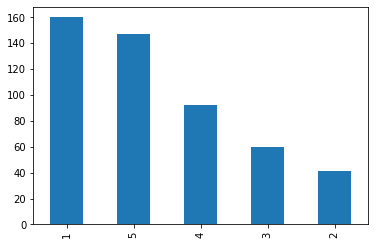

In [ ]:
google['score'].value_counts().plot(kind = 'bar')

In [ ]:
def convertScore(score):
  if score >= 4:
    return 'good'
  elif score == 3:
    return 'soso'
  else:
    return 'bad'

google['status'] = google['score'].map(lambda e: convertScore(e))

In [ ]:
google.head()

,username,score,comment,status
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,good
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,good
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,bad
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,good
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,good


In [ ]:
import jieba
corpus = []
tags = []
for idx, rec in google[google['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('comment'))))
  tags.append(rec.get('status'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [ ]:
x = tfidf
y = tags

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha = 0.01)
clf1.fit(train_x, train_y)

MultinomialNB(alpha=0.01)

In [ ]:
from sklearn.svm import SVC
clf2 = SVC(kernel = 'linear')
clf2.fit(train_x, train_y)

SVC(kernel='linear')

In [ ]:
pred_y = clf1.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.8181818181818182

In [ ]:
from sklearn.metrics import confusion_matrix
print(clf1.classes_)
confusion_matrix(test_y, pred_y)

['bad' 'good']


array([[30, 10],
       [ 6, 42]])

In [ ]:
features_ary = []
for word, bad_count, good_count in zip(vectorizer.get_feature_names(), clf1.feature_count_[0], clf1.feature_count_[1]):
  dic = {}
  dic['good_ratio'] = good_count/(bad_count + 1)
  dic['bad_ratio'] = bad_count / (good_count + 1)
  dic['good_cnt'] = good_count
  dic['bad_cnt'] = bad_count
  dic['word'] = word
  features_ary.append(dic)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features_ary = []
word = vectorizer.get_feature_names()
good_cnt = clf1.feature_count_[1]
bad_cnt = clf1.feature_count_[0]
for i in range(len(vectorizer.get_feature_names())):
  dict = {}
  dict['word'] = word[i]
  dict['good_ratio'] = good_cnt[i] / (bad_cnt[i] + 1)
  dict['bad_ratio'] = bad_cnt[i] / (good_cnt[i] + 1)
  features_ary.append(dict)

In [ ]:
import pandas
features_df = pandas.DataFrame(features_ary)

In [ ]:
features_df.sort_values('good_ratio', ascending=False).head(10)

,word,good_ratio,bad_ratio
971,好吃,4.432004,0.155759
12,24,4.281420,0.016871
1041,小時,4.281420,0.016871
2189,親切,4.264247,0.018926
973,好喝,4.072805,0.049346
2050,美味,3.478154,0.067243
2053,美食,3.343670,0.026732
2606,飲料,3.150396,0.073043
340,乾意,3.121750,0.085690
302,不錯,3.112518,0.115085


In [ ]:
features_df.sort_values('bad_ratio', ascending=False).head(10)

,word,good_ratio,bad_ratio
1247,態度,0.129321,3.228117
1004,客人,0.101876,2.808830
1130,店員態度,0.000000,2.552051
1439,普通,0.050667,2.548792
1924,知道,0.049725,2.343325
1974,第二次,0.000000,2.227581
293,不要,0.051669,2.202086
2483,重點,0.000000,2.158271
270,不會,0.155664,2.059802
2155,蟑螂,0.000000,2.035631


In [ ]:
pred_y = clf2.predict(test_x)

In [ ]:
accuracy_score(test_y, pred_y)

0.875

In [ ]:
confusion_matrix(test_y, pred_y)

array([[33,  7],
       [ 4, 44]])

## Synset

In [ ]:
import nltk
# nltk.download()
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [ ]:
wn.synsets('trunk')

[Synset('trunk.n.01'),
 Synset('trunk.n.02'),
 Synset('torso.n.01'),
 Synset('luggage_compartment.n.01'),
 Synset('proboscis.n.02')]

In [ ]:
wn.synset('car.n.01').lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

## 計數手法

In [ ]:
a = '''
def ppmi(C, verbose=False, eps = 1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M




'''

print(a.replace('\xa0', ' '))


def ppmi(C, verbose=False, eps = 1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M







In [ ]:
import numpy as np
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [ ]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
vocab_size

7

In [ ]:
print(word_to_id.keys())
C = create_co_matrix(corpus, vocab_size)
C

dict_keys(['you', 'say', 'goodbye', 'and', 'i', 'hello', '.'])


array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    # 1. 列出Query
    if query not in word_to_id:
        print('%s is not found' % query)
        return
    print('[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2. 計算Cosine Similarity
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cosine_similarity([word_matrix[i], query_vec])[1,0]
        
    # 3. 從cosine similarity 由高到低列出數值結果
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))
        count += 1
        if count >= top:
            return


In [ ]:
most_similar('you', word_to_id, id_to_word, C, top=5)

[query] you
 goodbye: 0.7071067811865475
 i: 0.7071067811865475
 hello: 0.7071067811865475
 say: 0.0
 and: 0.0


In [ ]:
most_similar('i', word_to_id, id_to_word, C, top=5)

[query] i
 goodbye: 0.9999999999999998
 you: 0.7071067811865475
 hello: 0.4999999999999999
 say: 0.0
 and: 0.0


In [ ]:
def ppmi(C, verbose=False, eps = 1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M

In [ ]:
W = ppmi(C)

In [ ]:
W

array([[0.       , 1.8073549, 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [1.8073549, 0.       , 0.8073549, 0.       , 0.8073549, 0.8073549,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.8073549, 0.       , 1.8073549, 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 1.8073549, 0.       , 0.       ,
        0.       ],
       [0.       , 0.8073549, 0.       , 0.       , 0.       , 0.       ,
        2.807355 ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 2.807355 ,
        0.       ]], dtype=float32)

In [ ]:
W.shape

(7, 7)

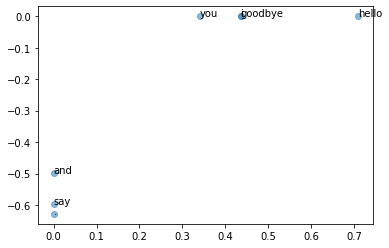

In [ ]:
# SVD
U, S, V = np.linalg.svd(W)

# 繪製相對位置圖
from matplotlib import pyplot as plt
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

###Practice 計數手法

In [ ]:
# Practice
import numpy as np
def preprocess(text):
    text = text.lower()
    text = text.replace(".", " .")
    words = text.split(' ')
    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word


def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    
    return co_matrix
    

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
c = create_co_matrix(corpus, vocab_size)

print(text)
print(corpus)
print(word_to_id.keys())
print(c)
print()


from sklearn.metrics.pairwise import cosine_similarity
query_text = 'you'
def most_similar(query_text, word_to_id, id_to_word, co_matrix):
    if query_text not in word_to_id:
        print('word not found')
        return
    print("[query_text]", ":", query_text)
    query_id = word_to_id[query_text]
    query_vec = co_matrix[query_id]
    s = cosine_similarity(co_matrix, [query_vec])
    s = np.array(s).flatten()
    for item in (-s).argsort():
        if(item != query_id):
            print(id_to_word[item], ":", s[item])
    return


most_similar(query_text, word_to_id, id_to_word, c)

You say goodbye and I say hello.
[0 1 2 3 4 1 5 6]
dict_keys(['you', 'say', 'goodbye', 'and', 'i', 'hello', '.'])
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]

[query_text] : you
goodbye : 0.7071067811865475
i : 0.7071067811865475
hello : 0.7071067811865475
say : 0.0
and : 0.0
. : 0.0


## 推論手法

In [ ]:
ary = ['a', 'b', 'c', 'a']
ary2 = [[1,0,0],
        [0,1,0],
        [0,0,1],
        [1,0,0]]

In [ ]:
import numpy as np
x = np.array([1,0,0,0,0,0,0])
w = np.random.randn(7,3)

In [ ]:
w

array([[-0.02596637,  0.99228419,  0.72757815],
       [ 0.11962403, -0.62997549,  0.09729984],
       [ 0.44152661, -1.37282941,  1.28375917],
       [-0.1705231 ,  0.52358297, -0.50156372],
       [ 0.8759564 , -0.72425117, -0.75814992],
       [-1.02537694,  0.61585547,  0.81039507],
       [ 0.21173475,  0.25439391, -0.81364164]])

In [ ]:
np.dot(x,w)

array([-0.02596637,  0.99228419,  0.72757815])

## Gensim

In [ ]:
from gensim.models import word2vec
text = 'You say goodbye and I say hello .'

In [ ]:
num_features = 2 # 詞向量的維度
min_word_count = 1 # 最少要出現幾個詞才被拿來計算
num_workers = 1 # 使用多少個core
context = 1 # 上下文的詞區間
epoch = 200 # 訓練多少迭代 
sample = 1e-5 # 每次要取多少反面的例子校正訓練結果
model = word2vec.Word2Vec([text.split()], 
  workers = num_workers,
  sample = sample,
  size = num_features,
  min_count=min_word_count,
  window = context,
  iter = epoch)


In [ ]:
for ele in model.wv.vocab:
  print(ele)

You
say
goodbye
and
I
hello
.


In [ ]:
X = model.wv.vectors

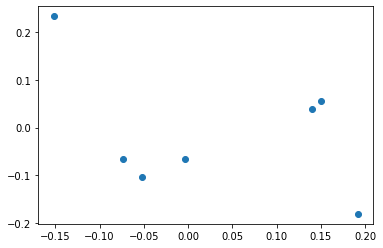

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])

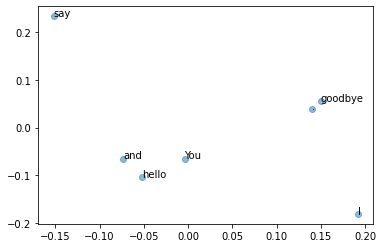

In [ ]:
# 繪製相對位置圖
from matplotlib import pyplot as plt
for vocab, vec in zip(model.wv.vocab, model.wv.vectors):
  plt.annotate(vocab, (vec[0], vec[1]))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()

In [ ]:
import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col=0)

In [ ]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感_x000D_\n有種覺得就是女兒""給蕭""害死了老爸_x000D_\...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [ ]:
import jieba
corpus = []
for e in df['content'].tolist():
    corpus.append(list(jieba.cut(e)))

In [ ]:
from gensim.models import word2vec
size = 50  # 產生多少維度 
min_count = 5 # 要算至少出現多少次數的字詞
workers = 1 # 使用多少個core 計算, -1 使用所有的core 進行計算 
window = 10  # 上下文的區間
iter = 1000 # 神經網路訓練的迭代數
sample = 1e-5 # 取樣的數量
model = word2vec.Word2Vec(corpus, 
                          workers = workers,
                          sample = sample,
                          size = size,
                          min_count=min_count,
                          window = window,
                          iter = iter)

In [ ]:
#for ele in model.wv.vocab:
#  print(ele)

In [ ]:
model.wv.most_similar('👍')

[('star', 0.6747989654541016),
 ('wars', 0.6495004296302795),
 ('a', 0.595984935760498),
 ('the', 0.545049786567688),
 ('商業片', 0.502611517906189),
 ('每', 0.49306684732437134),
 ('負評', 0.4917435646057129),
 ('be', 0.4659217298030853),
 ('com', 0.4593507945537567),
 ('超', 0.45603927969932556)]

In [ ]:
model.wv.get_vector('👍')

array([-0.56895506, -0.5430835 ,  0.54147476,  0.22969683,  0.25934264,
       -0.20891225, -0.3557881 ,  0.5468084 , -0.60768825,  0.5693542 ,
        0.7304566 ,  0.00867263,  1.4376706 ,  0.27727753, -0.37572053,
       -0.3356661 ,  1.083438  ,  0.09593012,  0.3894013 ,  0.3138438 ,
        0.01421614,  0.89512414,  0.7399393 , -0.5186362 ,  0.7769779 ,
        1.3208679 , -0.7775726 , -0.23095195, -1.1528277 ,  1.7975723 ,
       -0.40581977, -0.2298438 ,  0.20822418,  0.550394  ,  0.5131802 ,
        0.18884037,  0.1216433 , -0.82944506,  1.060951  , -0.12664291,
        0.24074304,  0.02680275,  0.12131407, -0.20784926, -0.5808499 ,
       -0.1597487 ,  0.09164612, -0.96870667,  0.02764206, -0.5354699 ],
      dtype=float32)

In [ ]:
import jieba
corpus = []
tags = []
for idx,rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(list(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))


In [ ]:
import numpy as np
size = 50
cnt = 0
vec = np.zeros(size).reshape((1, size))
#print(vec.shape)
for word in corpus[0]:
  try:
    #print(model.wv.get_vector(word))
    vec += model.wv.get_vector(word)
    cnt += 1
  except:
    pass
vec / cnt

array([[-0.00782682,  0.53583998, -0.47685081,  0.23002154, -0.03877084,
         0.10411172,  0.20661556, -0.01912236,  0.01165805,  0.4965258 ,
         0.24922278, -0.34102818,  0.10243034,  0.35521863, -0.27838144,
        -0.050312  , -0.48113865, -0.12642069,  0.27652984, -0.05621852,
         0.19006032, -0.12477603, -0.36330426, -0.04421114,  0.14308945,
        -0.32769991,  0.20731519,  0.11212953,  0.39608162, -0.2477685 ,
        -0.38847183,  0.14506697,  0.54848862, -0.27404351,  0.23423801,
        -0.41179243,  0.0313104 ,  0.26716286,  0.24955219, -0.29475139,
        -0.00758925, -0.26956699,  0.09932801,  0.37882421, -0.34623042,
         0.04510482, -0.22899704, -0.00673473,  0.47338825,  0.05706975]])

In [ ]:
import numpy as np
vecs = []
y = []
size = 50
for tag, s in zip(tags, corpus):
    vec = np.zeros(size).reshape((1, size))
    cnt = 0
    for w in s:
        if w in model:
            vec += model.wv.get_vector(w)
            cnt += 1
    if cnt > 0:
      vecs.append(vec / cnt)
      y.append(tag)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':


In [ ]:
len(vecs)

963

In [ ]:
vecs[0]

array([[-0.00782682,  0.53583998, -0.47685081,  0.23002154, -0.03877084,
         0.10411172,  0.20661556, -0.01912236,  0.01165805,  0.4965258 ,
         0.24922278, -0.34102818,  0.10243034,  0.35521863, -0.27838144,
        -0.050312  , -0.48113865, -0.12642069,  0.27652984, -0.05621852,
         0.19006032, -0.12477603, -0.36330426, -0.04421114,  0.14308945,
        -0.32769991,  0.20731519,  0.11212953,  0.39608162, -0.2477685 ,
        -0.38847183,  0.14506697,  0.54848862, -0.27404351,  0.23423801,
        -0.41179243,  0.0313104 ,  0.26716286,  0.24955219, -0.29475139,
        -0.00758925, -0.26956699,  0.09932801,  0.37882421, -0.34623042,
         0.04510482, -0.22899704, -0.00673473,  0.47338825,  0.05706975]])

In [ ]:
X = np.concatenate(vecs, axis = 0)

In [ ]:
# 建立訓練與測試資料集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#np.argwhere(np.isnan(X))

In [ ]:
# 建立模型
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_X, train_y)

SVC(kernel='linear')

In [ ]:
pred_y = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,pred_y)

0.7823834196891192

In [ ]:
confusion_matrix(test_y,pred_y)

array([[56, 24],
       [18, 95]])

In [ ]:
#! gdown https://drive.google.com/file/d/1tj0fszpULth9L2F2yVqRKmRAHi8xD_uc/view
! gdown https://drive.google.com/file/d/1rY9SMmYsgz0is3fgGkSQn3nDwc92ygd5/view

/usr/local/lib/python3.7/dist-packages/gdown/parse_url.py:39: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1rY9SMmYsgz0is3fgGkSQn3nDwc92ygd5
  url="https://drive.google.com/uc?id={}".format(file_id)
Downloading...
From: https://drive.google.com/file/d/1rY9SMmYsgz0is3fgGkSQn3nDwc92ygd5/view
To: /content/view
71.4kB [00:00, 33.8MB/s]


In [ ]:
! unzip zh_wiki_word2vec_300.zip

Archive:  zh_wiki_word2vec_300.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of zh_wiki_word2vec_300.zip or
        zh_wiki_word2vec_300.zip.zip, and cannot find zh_wiki_word2vec_300.zip.ZIP, period.


In [ ]:
from gensim.models import word2vec

In [ ]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('zh_wiki_word2vec_300.txt', binary=False)

FileNotFoundError: ignored

In [ ]:
model.wv.most_similar('貓')

In [ ]:
import jieba
for w in model.wv.vocab:
  jieba.add_word(w)
  
corpus = []
tags = []
for idx,rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(list(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))


In [ ]:
import numpy as np
vecs = []
y = []
size = 300
for tag, s in zip(tags, corpus):
    vec = np.zeros(size).reshape((1, size))
    cnt = 0
    for w in s:
        if w in model:
            vec += model.wv.get_vector(w)
            cnt += 1
    if cnt > 0:
      vecs.append(vec / cnt)
      y.append(tag)

In [ ]:
X = np.concatenate(vecs, axis = 0)

In [ ]:
X.shape

In [ ]:
# 建立訓練與測試資料集
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# 建立模型
from sklearn.svm import SVC
#from sklearn.ensemble import GradientBoostingClassifier
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)

In [ ]:
pred_y = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y,pred_y)

In [ ]:
confusion_matrix(test_y,pred_y)

##Practice推論手法

In [ ]:
import numpy as np
from gensim.models import word2vec

text = 'you say goodbye and i say hello.'

num_features = 2
num_workers = 1
min_word_count = 1
context =1
epoch = 200
sample = 1e-5
model = word2vec.Word2Vec([text.split()],
                          workers = num_workers,
                          size = num_features,
                          sample = sample,
                          min_count = min_word_count,
                          window = context,
                          iter = epoch)

for ele in model.wv.vocab:
    print(ele)

X = model.wv.vectors

from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1])


for vocab, vec in zip(model.wv.vocab, model.wv.vectors):
    plt.annotate(vocab, (vec[0], vec[1]))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show()



import pandas
df = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col=0)

import jieba 
corpus = []
for e in df['content'].tolist():
    corpus.append(list(jieba.cut(e)))

from gensim.models import word2vec
size = 50
min_count = 5
workers = -1
window = 10
iter = 10
sample = 1e-5
model = word2vec.Word2Vec(corpus,
                          workers = workers,
                          sample = sample,
                          size = size,
                          min_count = min_count,
                          window = window,
                          iter = iter)

# model.wv.get_vector('good')
# model.wv.most_similar('good')


# Jieba
import jieba
corpus = []
tags = []
for idx, rec in df[df['status'].isin(['good','bad'])].iterrows():
    corpus.append(list(jieba.cut(rec.get('content'))))
    tags.append(rec.get('status'))

import numpy as np
size = 50
cnt = 0
vec = np.zeros(size).reshape((1,size))


# 句向量 Vectorization
vecs = []
y = []
size = 50
for tag, sentence in zip(tags, corpus):
    cnt = 0
    vec = np.zeros(size).reshape((1, size))
    for w in sentence:
        try:
            if w in model.wv.vocab:
                vec += model.wv.get_vector(w)
                cnt += 1
        except:
            pass
    if cnt > 0:
        vecs.append(np.squeeze(vec / cnt))
        y.append(tag)

# import numpy as np
# size = 50
# vecs = []
# y = []
# for tag, sentence in zip(tags, corpus):
#     vec = np.zeros(size).reshape((1, size))
#     cnt = 0
#     for w in sentence:
#         if w in model:
#             vec += model.wv.get_vector(w)
#             cnt += 1
#     if cnt > 0:
#         vecs.append(vec / cnt)
#         y.append(tag)

# Classification
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(vecs, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(test_y, pred_y))
print(confusion_matrix(test_y, pred_y))



from gensim.models import word2vec
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('zh_wiki_word2vec_300.txt', binary = False)


import jieba
for w in model.wv.vocab:
    jieba.add_word(w)
corpus = []
tags = []
for idx, rec in df[df['status'].isin(['good', 'bad'])].iterrows():
    corpus.append(list(jieba.cut(rec.get('contnent'))))
    tags.append(rec.get('status'))


import gensim
from gensim.models import word2vec
model = gensim.models.keyedVectors.load_word2vec_fromat('zh_wiki_word2vec_300.txt')

size = 300
y = []
vecs = []
for s, tag in zip(corpus, tags):
    count = 0
    vec = np.zeros(size).reshape((1, size))
    for w in s:
        if w in model:
            vec += model.wv.get_vector(w)
            count += 1
    if count > 0:
        vecs.append(np.squeeze(vec / count))
        y.append(tag)


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split()

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)
pred_y = clf.predict(test_X)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)
confusion_matrix(test_y, pred_y)
